In [1]:
import numpy as np

In [2]:
N = 100
pts = np.random.random((N,2))

In [3]:
from scipy.spatial import Delaunay

In [4]:
D = Delaunay(pts)

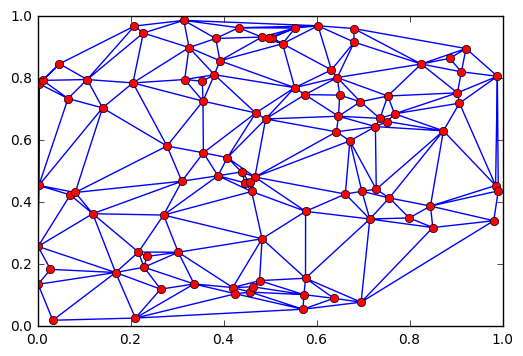

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.triplot(D.points[:,0], D.points[:,1], D.simplices.copy())
plt.plot(D.points[:,0], D.points[:,1], 'o')


This is garbage. Some triangles are really acute. The spacing sucks. I guess this is to be expected

In [6]:
import meshpy

In [7]:
import meshpy.triangle as tri

In [8]:
mesh_info = tri.MeshInfo()

In [9]:
mesh_info.set_points([[0,0],
               [0,1],
               [1,1],
               [1,0]])

In [10]:
mesh_info.set_facets([[0,1],[1,2],[2,3],[3,0]])

In [11]:
help(mesh_info)

Help on MeshInfo in module meshpy.triangle object:

class MeshInfo(meshpy._triangle.MeshInfo, meshpy.common.MeshInfoBase)
 |  Method resolution order:
 |      MeshInfo
 |      meshpy._triangle.MeshInfo
 |      Boost.Python.instance
 |      meshpy.common.MeshInfoBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __setstate__(self, xxx_todo_changeme)
 |  
 |  dump(self)
 |  
 |  set_facets(self, facets, facet_markers=None)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from meshpy._triangle.MeshInfo:
 |  
 |  __init__(...)
 |      __init__( (object)arg1) -> None :
 |      
 |          C++ signature :
 |              void __init__(_object*)
 |  
 |  __reduce__ = <unnamed Boost.Python function>(...)
 |  
 |  copy(...)
 |      copy( (MeshInfo)arg1) -> MeshInfo :
 |      
 |          C++ signature :
 |              tMeshInfo* copy(tMeshInfo)
 |  
 |  ------------------------------------------

In [36]:
def needs_refinement(vertex,area):
    return area > 0.1
mesh = tri.build(mesh_info,refinement_func=needs_refinement)

In [13]:
print(mesh.points)

In [37]:
for i, p in enumerate(mesh.points):
    print(i, p)
print("Point numbers in tetrahedra:")
for i, t in enumerate(mesh.elements):
    print(i, t)

0 [0.0, 0.0]
1 [0.0, 1.0]
2 [1.0, 1.0]
3 [1.0, 0.0]
4 [0.5, 0.5]
5 [0.0, 0.5]
6 [0.5, 0.0]
7 [0.5, 1.0]
8 [0.25, 0.25]
9 [1.0, 0.5]
10 [0.25, 0.75]
11 [0.75, 0.75]
12 [0.75, 0.25]
Point numbers in tetrahedra:
0 [4, 12, 9]
1 [8, 4, 5]
2 [10, 7, 1]
3 [1, 5, 10]
4 [12, 4, 6]
5 [4, 8, 6]
6 [0, 6, 8]
7 [11, 2, 7]
8 [5, 0, 8]
9 [9, 2, 11]
10 [4, 7, 10]
11 [5, 4, 10]
12 [4, 9, 11]
13 [7, 4, 11]
14 [3, 9, 12]
15 [6, 3, 12]


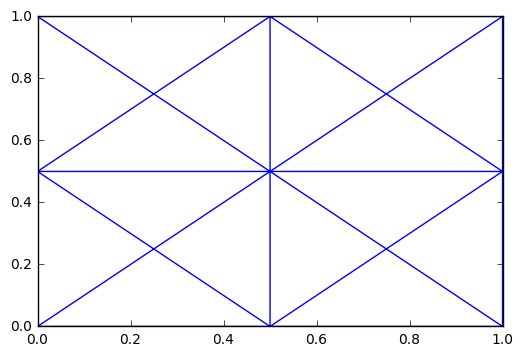

In [38]:
mesh_points = np.array(mesh.points)
mesh_tris = np.array(mesh.elements)

plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)

In [16]:
#mesh2 = tri.refine(mesh)
mesh_points = np.array(mesh2.points)
mesh_tris = np.array(mesh2.elements)

plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)

NameError: name 'mesh2' is not defined

THis crashes my python. Curious

[ -4.30277564e+00  -3.15891733e+00  -2.00000000e+00  -1.53740158e+00
  -1.53740158e+00  -1.24846793e+00  -6.97224362e-01  -5.27166091e-01
  -5.27166091e-01  -1.49595755e-16]


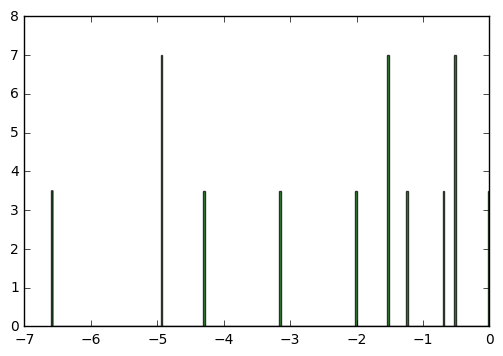

In [39]:
from scipy.linalg import eigvalsh, eigh
N = mesh_points.shape[0]
K = np.zeros((N,N))
A = np.zeros((N,N))
points = mesh_points
norm = np.linalg.norm
for triangle in  mesh_tris:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        c = triangle[i-2]
        ac = points[a] - points[c]
        
        bc = points[b] - points[c]
        # can acutally avoid the normalization since it cancels in amp anyhow
        cosalph = np.abs(np.dot(ac,bc)) # / norm(ac) / norm(bc)
        sinalph = norm(np.cross(ac,bc)) # / norm(ac) / norm(bc)
        amp = cosalph / sinalph
        K[a,b] += amp
        K[b,a] += amp
        K[a,a] += -1 * amp
        K[b,b] += -1 * amp
        
        A[b,b] += sinalph/6
        A[a,a] += sinalph/6
        
        #A[a,a] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[a] )) / 4.0
        #A[b,b] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[b] )) / 4.0

K = K / 2. #I think I double count every edge
energies = eigvalsh(K)
energs, funcs = eigh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies[-10:])

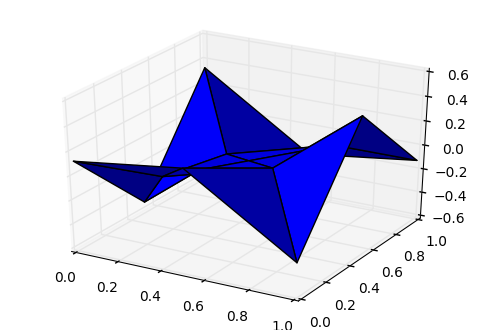

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1],funcs[:,-6])

In [29]:
print(funcs.shape)
print(points.shape)

(88, 88)
(88, 2)


In [ ]:
mesh.point_attributes

In [ ]:
from meshpy.tet import MeshInfo, build

mesh_info = MeshInfo()
mesh_info.set_points([
    (0,0,0), (2,0,0), (2,2,0), (0,2,0),
    (0,0,12), (2,0,12), (2,2,12), (0,2,12),
    ])
mesh_info.set_facets([
    [0,1,2,3],
    [4,5,6,7],
    [0,4,5,1],
    [1,5,6,2],
    [2,6,7,3],
    [3,7,4,0],
    ])
mesh = build(mesh_info)
print("Mesh Points:")
for i, p in enumerate(mesh.points):
    print(i, p)
print ("Point numbers in tetrahedra:")
for i, t in enumerate(mesh.elements):
    print (i, t)

In [ ]:
from scipy.linalg import eigvalsh, eigh
simpletri = [[0,0],
             [1,0
             0,1],
             [1,1]
]
N = mesh_points.shape[0]
K = np.zeros((N,N))
A = np.zeros((N,N))
points = mesh_points
norm = np.linalg.norm
for triangle in  mesh_tris:
    for i in range(3):
        a = triangle[i-1]
        b = triangle[i]
        c = triangle[i-2]
        ac = points[a] - points[c]
        
        bc = points[b] - points[c]
        # can acutally avoid the normalization since it cancels in amp anyhow
        cosalph = np.abs(np.dot(ac,bc)) # / norm(ac) / norm(bc)
        sinalph = norm(np.cross(ac,bc)) # / norm(ac) / norm(bc)
        amp = cosalph / sinalph
        K[a,b] += amp
        K[b,a] += amp
        K[a,a] += -1 * amp
        K[b,b] += -1 * amp
        
        A[b,b] += sinalph/6
        A[a,a] += sinalph/6
        
        #A[a,a] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[a] )) / 4.0
        #A[b,b] += norm(np.cross( hull.points[a] - hull.points[b], dualiso.vertices[dualvert] - hull.points[b] )) / 4.0

K = K / 2. #I think I double count every edge
energies = eigvalsh(K)
energs, funcs = eigh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies[-10:])

In [40]:
print(K)

[[-1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. -4.  0.  0.  0.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0. -2.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  1.  1.  0.]
 [ 1.  0.  0.  0.  1.  1.  1.  0. -4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  1.  1.]
 [ 0.  1.  0.  0.  1.  1.  0.  1.  0.  0. -4.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0. -4.  0.]
 [ 0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0. -4.]]
